In [1]:
import sys
sys.prefix

'C:\\Users\\Rdebbout\\AppData\\Local\\Continuum\\Anaconda2\\envs\\nusc'

In [4]:
math.ceil?

In [5]:
import requests
import matplotlib.pyplot as py_plot
import pandas as pd
from IPython.display import display, HTML
from pyproj import Proj, transform
import folium
from folium import plugins
import math

#url from api explorer tab in open data platform
api_url = 'https://services5.arcgis.com/54falWtcpty3V47Z/arcgis/rest/services/cad_calls_year3/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

#function to return a list of column headers and rows of data from the json api call
def opendata_api(api_call):
    n = 0
    #build empty list for all data
    all_data = []
    #get a count of total records in api request
    call_count = requests.get(api_call,"&returnCountOnly=true").json()
    count = call_count['count']
    #calculate number of requests to make due to 1000 max record count
    loop_count = int(math.ceil(count/1000))

    for count in range(loop_count):
        call_json = requests.get(api_call,'&resultOffset='+str(n)).json()
        
        #build a list of dictionaries by getting the values of the features key
        calls_feats = call_json["features"]
        #loop to get the values of the attributes dictionary
        for line in calls_feats:
            all_data.append(line["attributes"])
        n+=1000
        #print("Number of requests is ", count)
    
    #return the keys of the first dictionary get column names
    fields = list(all_data[0].keys())

    #a list comprehension to populate a list of attributes into the list we are building called rows
    rows = [list(item.values()) for item in all_data]
    return rows,fields

make_request = opendata_api(api_url)
data = make_request[0]
columns = make_request[1]

print(columns)


[u'Received_Time', u'Dispatch_Date', u'Unit_ID', u'Location', u'Record_ID', u'Description', u'Beat', u'Reporting_Officer', u'Day_of_Week', u'Grid', u'Received_Date', u'Clear_Date', u'Report_Created', u'Police_District', u'Occurence_Time', u'OBJECTID', u'Y_Coordinate', u'Clear_Time', u'At_Scene_Date', u'At_Scene_Time', u'Enroute_Date', u'Call_Type', u'X_Coordinate', u'Enroute_Time', u'Occurence_Date', u'Dispatch_Time']


In [6]:
#print the first 5 records of data      
print(data[0:5])

[[u'22:15:12', 1514793600000L, u'1C15', u'3430 WINTER PARK DR', u'6817842', u'SHOTS FIRED - LESS THAN 15 AGO', u'1B', u'0957', u'Mon', u'0401', 1514793600000L, 1514793600000L, u'N', u'1', u'22:15:12', 1, 1991748, u'22:34:13', 1514793600000L, u'22:29:50', 1514793600000L, u'927S', 6703388, u'22:23:55', 1514793600000L, u'22:23:55'], [u'15:36:50', -2240496420000L, u'', u'5 YACABUCCI CT', u'6817554', u'ALL UNITS BROADCAST', u'2B', u'', u'Mon', u'0564', 1514793600000L, 1514793600000L, u'N', u'2', u'15:36:50', 2, 1987124, u'15:40:11', -2240496420000L, u'        ', -2240496420000L, u'AU', 6722675, u'        ', 1514793600000L, u'        '], [u'14:16:06', 1514793600000L, u'BIK2', u'110 K ST', u'6817555', u'DISTURBANCE-CLARIFY', u'3M', u'297', u'Mon', u'0741', 1514793600000L, -2240496420000L, u'N', u'3', u'14:16:06', 3, 1974123, u'        ', 1514793600000L, u'15:13:08', 1514793600000L, u'415', 6703016, u'15:08:17', 1514793600000L, u'15:08:17'], [u'07:34:21', -2240496420000L, u'', u'3701 FRANKLIN 

In [7]:
#building a pandas dataframe called "calls"
calls = pd.DataFrame.from_records(data, columns=columns)

#returns the counts for each unique value in the "Description" field
display(calls['Description'].value_counts())

DISTURBANCE-CLARIFY                             4196
TRAFFIC STOP                                    3756
SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS     2458
SUSPICIOUS VEHICLE-OCCUPIED                     2043
ALL UNITS BROADCAST                             2032
WELFARE CHECK                                   1787
SUBJECT STOP                                    1686
INCOMPLETE CALL FOR POLICE                      1335
REPORT NUMBER ASSIGNMENT                         758
BUSINESS CHECK                                   684
ERRAND                                           680
ALARM-SECURE NO EVID OF CRIME                    673
MISDEMEANOR ASSAULT-IN PROGRESS                  647
PARK CHECK                                       605
VEHICLE ACCIDENT-NO OR UNKNOWN INJURIES          572
DISTURBANCE-FAMILY                               488
CHECK ON HAZARD                                  480
ALARM-CANCEL                                     476
VEHICLE ACCIDENT-INJURIES                     

In [8]:
#describe method on the "description" field
calls['Description'].describe()

count                   35000
unique                    176
top       DISTURBANCE-CLARIFY
freq                     4196
Name: Description, dtype: object

In [9]:
#using the display() function to view calls dataframe as a table
display(calls[0:5])

,Received_Time,Dispatch_Date,Unit_ID,Location,Record_ID,Description,Beat,Reporting_Officer,Day_of_Week,Grid,...,Y_Coordinate,Clear_Time,At_Scene_Date,At_Scene_Time,Enroute_Date,Call_Type,X_Coordinate,Enroute_Time,Occurence_Date,Dispatch_Time
0,22:15:12,1514793600000,1C15,3430 WINTER PARK DR,6817842,SHOTS FIRED - LESS THAN 15 AGO,1B,0957,Mon,0401,...,1991748,22:34:13,1514793600000,22:29:50,1514793600000,927S,6703388,22:23:55,1514793600000,22:23:55
1,15:36:50,-2240496420000,,5 YACABUCCI CT,6817554,ALL UNITS BROADCAST,2B,,Mon,0564,...,1987124,15:40:11,-2240496420000,,-2240496420000,AU,6722675,,1514793600000,
2,14:16:06,1514793600000,BIK2,110 K ST,6817555,DISTURBANCE-CLARIFY,3M,297,Mon,0741,...,1974123,,1514793600000,15:13:08,1514793600000,415,6703016,15:08:17,1514793600000,15:08:17
3,07:34:21,-2240496420000,,3701 FRANKLIN BLVD,6817237,INCOMPLETE CALL-PAY PHONE,4B,,Mon,0958,...,1959222,07:35:49,-2240496420000,,-2240496420000,952PP,6711727,,1514793600000,
4,10:58:04,1514793600000,1B27,999 NORTH AVE,6817367,INCOMPLETE CALL FOR POLICE,2A,0965,Mon,0503,...,1995679,11:14:47,1514793600000,11:05:34,1514793600000,952,6720364,11:02:57,1514793600000,11:02:45


In [10]:
#count of incidents by day of week
calls['Day_of_Week'].value_counts()

Thu    5843
Wed    5683
Tue    5438
Mon    4782
Fri    4775
Sat    4531
Sun    3948
Name: Day_of_Week, dtype: int64

In [11]:
#convert x,y coords to float data type if they are string or int
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
calls['X_Coordinate'] = calls['X_Coordinate'].apply(parse_float)
calls['Y_Coordinate'] = calls['Y_Coordinate'].apply(parse_float)

In [12]:
#create a variable that contains only accident Vehicle Reports from "Description" field
accident = calls[calls['Description'] == 'VEHICLE ACCIDENT-INJURIES']

display(accident[0:5])

,Received_Time,Dispatch_Date,Unit_ID,Location,Record_ID,Description,Beat,Reporting_Officer,Day_of_Week,Grid,...,Y_Coordinate,Clear_Time,At_Scene_Date,At_Scene_Time,Enroute_Date,Call_Type,X_Coordinate,Enroute_Time,Occurence_Date,Dispatch_Time
901,12:57:01,1514880000000,1B62,FRUITRIDGE RD / SAMPSON BLVD,6818498,VEHICLE ACCIDENT-INJURIES,6B,1032,Tue,1084,...,1953464.0,13:06:25,-2240496420000,,1514880000000,901A,6719182.0,12:59:12,1514880000000,12:58:59
1239,21:50:27,1514880000000,1C18,NORTHGATE BLVD / TANDY DR,6819046,VEHICLE ACCIDENT-INJURIES,1C,0425,Tue,0309,...,1996876.0,22:25:12,1514880000000,21:59:08,1514880000000,901A,6711160.0,21:52:47,1514880000000,21:52:24
1359,10:00:24,1514966400000,1B35,13TH ST / G ST,6819451,VEHICLE ACCIDENT-INJURIES,3A,538,Wed,0725,...,1974351.0,10:52:06,1514966400000,10:08:35,1514966400000,901A,6708085.0,10:04:20,1514966400000,10:04:11
1531,23:32:53,-2240496420000,,EXPOSITION BLVD / BUS 80 EB,6820338,VEHICLE ACCIDENT-INJURIES,2C,,Wed,0626,...,1979693.0,23:34:33,-2240496420000,,-2240496420000,901A,6720724.0,,1514966400000,
1672,23:24:03,-2240496420000,,E ST / 16TH ST,6820332,VEHICLE ACCIDENT-INJURIES,3B,,Wed,0716,...,1974769.0,23:24:47,-2240496420000,,-2240496420000,901A,6709496.0,,1514966400000,


<IPython.core.display.Javascript object>


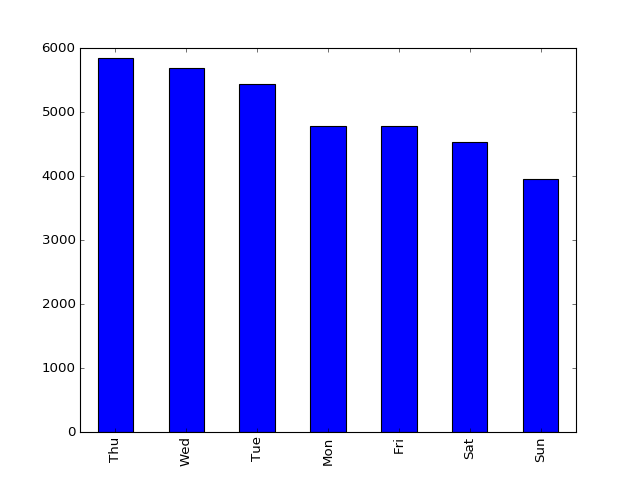

In [13]:
#using matplotlib magic to plot a bar chart of incidents by day of the week
%matplotlib notebook
calls['Day_of_Week'].value_counts().plot(kind='bar')

In [14]:
#using the pyproj library to reproject x,y coordinates from state plane zone II to WGS84 lat/long
inProj = Proj(init='epsg:2226', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 6722570,1992314
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

(-121.43672656313065, 38.63153998649104)


In [15]:
calls_map = folium.Map(location=[38.58, -121.5], tiles=("https://api.mapbox.com/styles/v1/mapbox/streets-v10/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoiZGFyYW9iZWlybmUiLCJhIjoidlV2WXZKRSJ9.EwVOY6b8UeyIz3N2UAu5pw"),
           zoom_start=11,
          attr='Mapbox attribution')
marker_cluster = folium.MarkerCluster().add_to(calls_map)
coords_list = []
#to save on memory/time we only call the first 1,000 records to map
for name, row in accident.iloc[:1000].iterrows():   
    x1, y1 =row['X_Coordinate'],row['Y_Coordinate']
    #converts each set coordinates from state plane to lat/long
    long, lat = transform(inProj,outProj,x1,y1)
    coords = (lat,long)
    #add the set of coordinates to the list
    coords_list.append(coords)
    folium.Marker([lat, long], popup="Day of the week was " + row['Day_of_Week']).add_to(marker_cluster)

#saves callsnew.html in the working directory
calls_map.save('callsnew.html')
calls_map

In [16]:
calls_heatmap = folium.Map(location=[38.58, -121.5], tiles='Stamen Toner', zoom_start=13)

#create a heatmap using the same data as above
calls_heatmap.add_child(plugins.HeatMap([[item[0], item[1]] for item in coords_list]))
calls_heatmap.save("heatmap.html")
calls_heatmap

In [27]:
stamen_watercolor = folium.Map(location=[38.58, -121.5], tiles='Stamen WaterColor', zoom_start=13)
stamen_watercolor.save("watermap.html")
stamen_watercolor